##  Project 5 Vehicle Detection and Tracking


In [1]:
import numpy as np
import cv2, glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#%matplotlib qt
%matplotlib inline

In [2]:
# # # the code in 28. Color Classify
# # # https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/fd66c083-4ccb-4fe3-bda1-c29db76f50a0/concepts/be308636-742b-416a-8fcc-c6071865a11f


# # Define a function to compute binned color features  
# def bin_spatial(img, size=(32, 32)):
#     # Use cv2.resize().ravel() to create the feature vector


In [3]:
### TODO: Tweak these parameters and see how the results change.
#color_space = 'RGB' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
#color_space = 'HSV'
color_space = 'HLS'

orient = 9  # HOG orientations

pix_per_cell = 8 # HOG pixels per cell
#pix_per_cell = 4 # HOG pixels per cell

cell_per_block = 2 # HOG cells per block
cell_per_block = 2 # HOG cells per block

hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
#spatial_size = (16, 16) # Spatial binning dimensions
spatial_size = (16, 16) # Spatial binning dimensions

#hist_bins = 16    # Number of histogram bins
hist_bins = 16    # Number of histogram bins

spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [None, None] # Min and max in y to search in slide_window()


In [4]:
# # lecture 32. sliding window implementation.
# # https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/fd66c083-4ccb-4fe3-bda1-c29db76f50a0/concepts/8e39c07e-afd5-4ba5-9204-8b44aa39285c

# # Here is your draw_boxes function from the previous exercise
# def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
#     # Make a copy of the image


In [5]:
import matplotlib.image as mpimg
import numpy as np
import cv2
from skimage.feature import hog
# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block,
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient,
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block),
                                  transform_sqrt=True,
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:
        features = hog(img, orientations=orient,
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block),
                       transform_sqrt=True,
                       visualise=vis, feature_vector=feature_vec)
        return features

# Define a function to compute binned color features
# def bin_spatial(img, size=(32, 32)):
#     # Use cv2.resize().ravel() to create the feature vector
#     features = cv2.resize(img, size).ravel()
#     # Return the feature vector
#     return features

# Define a function to compute binned color features
def bin_spatial(img, size=(32, 32)):
    color1 = cv2.resize(img[:,:,0], size).ravel()
    color2 = cv2.resize(img[:,:,1], size).ravel()
    color3 = cv2.resize(img[:,:,2], size).ravel()
    return np.hstack((color1, color2, color3))


# Define a function to compute color histogram features
# NEED TO CHANGE bins_range if reading .png files with mpimg!
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features




def extract_features(imgs, color_space='RGB', orient=9, spatial_size=(32, 32), hist_bins=32,
                     pix_per_cell=8, cell_per_block=2, hog_channel='ALL',
                     bin_feature='Enabled',color_feature='Enabled'):
    import matplotlib.image as mpimg

    features = []
    m_features=[]

    for file in imgs:

        image = mpimg.imread(file)

        if color_space != 'RGB':
            if color_space == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif color_space == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif color_space == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif color_space == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif color_space == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      

        # Call get_hog_features() with vis=False, feature_vec=True
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))
            hog_features = np.ravel(hog_features)        
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        
        bin_features = []
        bin_features = bin_spatial (feature_image, size=spatial_size).ravel()  
        
        color_features = []
        color_features = color_hist(feature_image, nbins=hist_bins).ravel() 
        
        if (bin_feature=='Enabled' and color_feature =='Enabled'): 
# Todo            
#            m_features.append (np.hstack((bin_features, hog_features)))
            m_features.append (np.hstack((bin_features, color_features, hog_features)))
            
        elif (color_feature == 'Enabled'): 
            m_features.append (np.hstack((color_features, hog_features,)))

        elif (bin_feature == 'Enabled'):
            m_features.append (np.hstack((bin_features, hog_features, color_features)))
        else:
            m_features.append (hog_features)
            
    return m_features



# Define a function that takes an image,
# start and stop positions in both x and y,
# window size (x and y dimensions),
# and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None],
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # Compute the span of the region to be searched
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step)
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step)
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]

            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list

# Define a function to draw bounding boxes
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy


In [6]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

from skimage.feature import hog

# from lesson_functions import *
# NOTE: the next import is only valid for scikit-learn version <= 0.17
# for scikit-learn >= 0.18 use:
# from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split

import time
start_time = time.time()
# Define a function to extract features from a single image window
# This function is very similar to extract_features()
# just for a single image rather than list of images
def single_img_features(img, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):    
    #1) Define an empty list to receive features
    img_features = []
    #2) Apply color conversion if other than 'RGB'
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)      
    #3) Compute spatial features if flag is set
    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        #4) Append features to list
        img_features.append(spatial_features)
    #5) Compute histogram features if flag is set
    if hist_feat == True:
        hist_features = color_hist(feature_image, nbins=hist_bins)
        #6) Append features to list
        img_features.append(hist_features)
    #7) Compute HOG features if flag is set
    if hog_feat == True:
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.extend(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))      
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        #8) Append features to list
        img_features.append(hog_features)

    #9) Return concatenated array of features
    return np.concatenate(img_features)


# Define a function you will pass an image 
# and the list of windows to be searched (output of slide_windows())
def search_windows(img, windows, clf, scaler, color_space='RGB', 
                    spatial_size=(32, 32), hist_bins=32, 
                    hist_range=(0, 256), orient=9, 
                    pix_per_cell=8, cell_per_block=2, 
                    hog_channel=0, spatial_feat=True, 
                    hist_feat=True, hog_feat=True):

    #1) Create an empty list to receive positive detection windows
    on_windows = []
    #2) Iterate over all windows in the list
    for window in windows:
        #3) Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))      
        #4) Extract features for that window using single_img_features()
        features = single_img_features(test_img, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)
        
#        print('features shape: ',features.shape) 
        #5) Scale extracted features to be fed to classifier
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        #6) Predict using your classifier
        prediction = clf.predict(test_features)
        #7) If positive (prediction == 1) then save the window
        if prediction == 1:
            on_windows.append(window)
#            print('prediction == 1:')
        else:
#            print('no prediction')
            pass
            
    #8) Return windows for positive detections
    return on_windows
    
    


/home/pachinko/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
start_time = time.time()

# # Read in cars and notcars
# images = glob.glob('*.jpeg')
# cars = []
# notcars = []
# for image in images:
#     if 'image' in image or 'extra' in image:
#         notcars.append(image)
#     else:
#         cars.append(image)

# Read in car and non-car images
cars = []
notcars = []
car_images = glob.glob('training_set/vehicles/GTI_MiddleClose/*.png')
for image in car_images:
    cars.append(image)
# car_images = glob.glob('training_set/vehicles/GTI_Left/*.png')
# for image in car_images:
#     cars.append(image)
# car_images = glob.glob('training_set/vehicles/GTI_Right/*.png')
# for image in car_images:
#     cars.append(image)
# car_images = glob.glob('training_set/vehicles/GTI_Far/*.png')
# for image in car_images:
#     cars.append(image)
# car_images = glob.glob('training_set/vehicles/KITTI_extracted/*.png')
# for image in car_images:
#     cars.append(image)
    
notcar_images = glob.glob('training_set/non-vehicles/GTI/*.png')
for image in notcar_images:
    notcars.append(image)
# notcar_images = glob.glob('training_set/non-vehicles/Extras/*.png')
# for image in notcar_images:
#     notcars.append(image)
   
    
# todo remove this!!!!!!!
# Reduce the sample size because
# The quiz evaluator times out after 13s of CPU time
sample_size = 500
cars = cars[0:sample_size]
notcars = notcars[0:sample_size]

print('cars size : ', len(cars))
print('notcars size : ', len(notcars))

elapsed_time = time.time() - start_time
print('elapsed_time : ', elapsed_time )


# ### TODO: Tweak these parameters and see how the results change.
# #color_space = 'RGB' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
# #color_space = 'HSV'
# color_space = 'HLS'

# orient = 9  # HOG orientations

# pix_per_cell = 8 # HOG pixels per cell
# #pix_per_cell = 4 # HOG pixels per cell

# cell_per_block = 2 # HOG cells per block
# cell_per_block = 2 # HOG cells per block

# hog_channel = 0 # Can be 0, 1, 2, or "ALL"
# #spatial_size = (16, 16) # Spatial binning dimensions
# spatial_size = (16, 16) # Spatial binning dimensions

# #hist_bins = 16    # Number of histogram bins
# hist_bins = 16    # Number of histogram bins

# spatial_feat = True # Spatial features on or off
# hist_feat = True # Histogram features on or off
# hog_feat = True # HOG features on or off
# y_start_stop = [None, None] # Min and max in y to search in slide_window()

car_features = extract_features(cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel
#                                , spatial_feat=spatial_feat, hist_feat=hist_feat, hog_feat=hog_feat
                               )

notcar_features = extract_features(notcars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel
#                                   , spatial_feat=spatial_feat, hist_feat=hist_feat, hog_feat=hog_feat
                                  )
print('car_features shape:, ', len(car_features) )

X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

print('X:, ', X.shape, ' X_scaler: ', X_scaler)


# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))


# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()


elapsed_time = time.time() - start_time
print('elapsed_time : ', elapsed_time )


/home/pachinko/anaconda3/envs/py35/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


cars size :  419
notcars size :  500
elapsed_time :  0.015037059783935547
car_features shape:,  419
X:,  (919, 6108)  X_scaler:  StandardScaler(copy=True, with_mean=True, with_std=True)
Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 6108
0.2 Seconds to train SVC...
Test Accuracy of SVC =  0.9946
elapsed_time :  5.702048301696777


elapsed_time :  0.06902503967285156


/home/pachinko/anaconda3/envs/py35/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


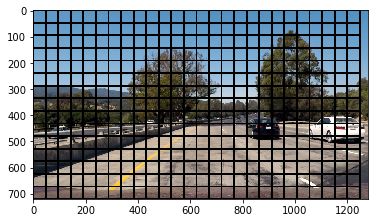

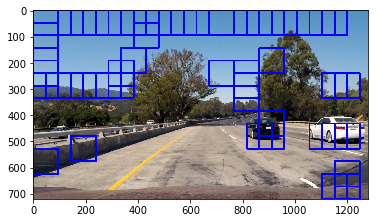

elapsed_time :  2.8232274055480957


In [8]:
import time
start_time = time.time()

image = mpimg.imread('test_images/test1.jpg')
draw_image = np.copy(image)

# Uncomment the following line if you extracted training
# data from .png images (scaled 0 to 1 by mpimg) and the
# image you are searching is a .jpg (scaled 0 to 255)
image = image.astype(np.float32)/255

windows = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                    xy_window=(96, 96), xy_overlap=(0.5, 0.5))
# windows = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
#                     xy_window=(48, 48), xy_overlap=(0.5, 0.5))

elapsed_time = time.time() - start_time
print('elapsed_time : ', elapsed_time )

hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel
                        ,spatial_feat=spatial_feat, hist_feat=hist_feat, hog_feat=hog_feat
                            )

window_img = draw_boxes(image, windows, color=(0, 0, 255), thick=6)                    
plt.imshow(window_img)
plt.show()

window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)                    
plt.imshow(window_img)
plt.show()

elapsed_time = time.time() - start_time
print('elapsed_time : ', elapsed_time )


In [9]:
def convert_color(img, conv='RGB2YCrCb'):
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)



In [10]:
import numpy as np
import cv2
from skimage.feature import hog

def convert_color(img, conv='RGB2YCrCb'):
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)

def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=False, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       transform_sqrt=False, 
                       visualise=vis, feature_vector=feature_vec)
        return features

def bin_spatial(img, size=(32, 32)):
    color1 = cv2.resize(img[:,:,0], size).ravel()
    color2 = cv2.resize(img[:,:,1], size).ravel()
    color3 = cv2.resize(img[:,:,2], size).ravel()
    return np.hstack((color1, color2, color3))
                        
def color_hist(img, nbins=32):    #bins_range=(0, 256)
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features



In [11]:

# def find_cars(img, ystart, ystop, scale, cspace, hog_channel, svc, X_scaler, orient, 
#               pix_per_cell, cell_per_block, spatial_size, hist_bins, 
#               show_all_rectangles=False, bin_feature='Enabled', color_feature='Enabled'):

#     # array of rectangles where cars were detected
#     rectangles = []
    
#     img = img.astype(np.float32)/255
#     draw_img = np.copy(img)

#     img_tosearch = img[ystart:ystop,:,:]

#     # apply color conversion if other than 'RGB'
#     if cspace != 'RGB':
#         if cspace == 'HSV':
#             ctrans_tosearch = cv2.cvtColor(img_tosearch, cv2.COLOR_RGB2HSV)
#         elif cspace == 'LUV':
#             ctrans_tosearch = cv2.cvtColor(img_tosearch, cv2.COLOR_RGB2LUV)
#         elif cspace == 'HLS':
#             ctrans_tosearch = cv2.cvtColor(img_tosearch, cv2.COLOR_RGB2HLS)
#         elif cspace == 'YUV':
#             ctrans_tosearch = cv2.cvtColor(img_tosearch, cv2.COLOR_RGB2YUV)
#         elif cspace == 'YCrCb':
#             ctrans_tosearch = cv2.cvtColor(img_tosearch, cv2.COLOR_RGB2YCrCb)
#     else: ctrans_tosearch = np.copy(img)   
    
#     # rescale image if other than 1.0 scale
#     if scale != 1:
#         imshape = ctrans_tosearch.shape
#         ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
    
#     # select colorspace channel for HOG 
#     if hog_channel == 'ALL':
#         ch1 = ctrans_tosearch[:,:,0]
#         ch2 = ctrans_tosearch[:,:,1]
#         ch3 = ctrans_tosearch[:,:,2]
#     else: 
#         ch1 = ctrans_tosearch[:,:,hog_channel]

#     # Define blocks and steps as above
#     nxblocks = (ch1.shape[1] // pix_per_cell)+1  #-1
#     nyblocks = (ch1.shape[0] // pix_per_cell)+1  #-1 
#     nfeat_per_block = orient*cell_per_block**2
#     # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
#     window = 64
#     nblocks_per_window = (window // pix_per_cell) - 1
#     nblocks_per_window = window // pix_per_cell - cell_per_block + 1
    
#     cells_per_step = 2  # Instead of overlap, define how many cells to step
#     nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
#     nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
#     # Compute individual channel HOG features for the entire image
      
#     if hog_channel == 'ALL':
#         hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False) 
#         hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
#         hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    
#     for xb in range(nxsteps):
#         for yb in range(nysteps):
#             ypos = yb*cells_per_step
#             xpos = xb*cells_per_step
#             # Extract HOG for this patch
            
#             if hog_channel == 'ALL':
#                 hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel()
#                 hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
#                 hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
#                 hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))
#             else:
#                 hog_features = hog_feat1

#             xleft = xpos*pix_per_cell
#             ytop = ypos*pix_per_cell
            
            
#             if ((bin_feature == 'Enabled') or (color_feature == 'Enabled')):
#                 # Extract the image patch
#                 subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))

#                 # Get color features
#                 if bin_feature=='Enabled' and color_feature =='Enabled': 
#                     bin_features = bin_spatial(subimg, size=spatial_size)
#                     color_features = bin_spatial(subimg, size=spatial_size)
#                     hist_features = color_hist(subimg, nbins=hist_bins)

# #                     print('bin_features, color_features, hog_features, hist_features : ', 
# #                           bin_features.shape, color_features.shape, hog_features.shape, hist_features.shape )
# # todo
# #                    X = np.hstack((bin_features, color_features, hog_features)).reshape(1, -1).astype(np.float64)
#                     X = np.hstack((bin_features, hist_features, hog_features)).reshape(1, -1).astype(np.float64)
            
#                 elif color_feature == 'Enabled': 
#                     color_features = bin_spatial(subimg, size=spatial_size)
#                     X = np.hstack((color_features, hog_features)).reshape(1, -1).astype(np.float64)
#                 else:
#                     bin_features = bin_spatial(subimg, size=spatial_size)
#                     X = np.hstack((bin_features, hog_features)).reshape(1, -1).astype(np.float64)
#             else: 
#                 #print("test")
#                 X  = hog_features.reshape(1, -1)
                            
#             #min_X = X.min()
#             #max_X = X.max()
#             #test_features = X - X.max() / (X.max() - X.min()) 
#             #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
#             #test_prediction = svc.predict(test_features)
            
#             ######################################################################
            
#             test_prediction = svc.predict( X )
            
#             if test_prediction == 1 or show_all_rectangles:
#                 xbox_left = np.int(xleft*scale)
#                 ytop_draw = np.int(ytop*scale)
#                 win_draw = np.int(window*scale)
#                 rectangles.append(((xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart)))
                
#                 cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),
#                               (xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 

                
#     return rectangles, draw_img


# ystart = 400
# ystop = 656
# scale = 1.5

# # spatial_size = (16, 16) # Spatial binning dimensions
# # hist_bins = 16    # Number of histogram bins

# img = mpimg.imread('test_images/test1.jpg')
# out_rect, out_img = find_cars(img, ystart, ystop, scale, color_space, hog_channel, svc, X_scaler, orient, 
#                     pix_per_cell, cell_per_block, spatial_size, hist_bins,
#                     True, 'Enabled', 'Enabled')
# #                   True, 'Enabled', 'Disabled')
# #                   True, 'Disabled', 'Disabled')

# print('out_rect :', len(out_rect) )
# #plt.imshow(out_img)



/home/pachinko/anaconda3/envs/py35/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


out_rect : 350


/home/pachinko/anaconda3/envs/py35/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


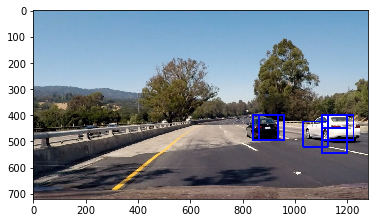

In [16]:
# example code from lecture 35. Hog Sub-sampling window search:
# https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/2b62a1c3-e151-4a0e-b6b6-e424fa46ceab/lessons/fd66c083-4ccb-4fe3-bda1-c29db76f50a0/concepts/c3e815c7-1794-4854-8842-5d7b96276642

# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, 
              spatial_size, hist_bins):
    
    draw_img = np.copy(img)
    img = img.astype(np.float32)/255
    
    img_tosearch = img[ystart:ystop,:,:]
    ctrans_tosearch = convert_color(img_tosearch, conv='RGB2YCrCb')
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
# todo: window, cells_per_step, should not be hard coded?
# should edit code refer to this discussion: 
# https://discussions.udacity.com/t/hog-sub-sampling-window-search/235413/30?u=sun.pochin
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
          
            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)

            # Scale features and make a prediction
            test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
            #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
            test_prediction = svc.predict(test_features)
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 
                
    return draw_img
    
ystart = 400
ystop = 656
scale = 1.5
    
img = mpimg.imread('test_images/test4.jpg')
out_img = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)

plt.imshow(out_img)



In [13]:
interrupt here

NameError: name 'hihi' is not defined

In [19]:
def process_one_image(img, debug = False):
    out_img = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)

    return out_img

def process_image(image, debug = False):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image where lines are drawn on lanes)
    
    # turn on debug to produce some image, for debugging or the writeups.
    # debug = True
    return process_one_image(image)


In [20]:
# make sure the output folder exist.
import os
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

outputdir = 'test_videos_output'
if not os.path.exists(outputdir):
    os.makedirs(outputdir)
    
white_output = outputdir + '/project-output.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("project_video.mp4").subclip(26, 30)
#clip1 = VideoFileClip("project_video.mp4").subclip(39,43)
#clip1 = VideoFileClip("project_video.mp4")

#clip1 = VideoFileClip("challenge_video.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)




[MoviePy] >>>> Building video test_videos_output/project-output.mp4
[MoviePy] Writing video test_videos_output/project-output.mp4


100%|█████████▉| 1260/1261 [11:00<00:00,  1.85it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/project-output.mp4 

CPU times: user 10min 55s, sys: 5.04 s, total: 11min
Wall time: 11min 2s
